# Avant de démarrer
***

## Les notebooks Jupyter:

Un notebook est divisé en cellules. Chaque cellule peut contenir du code (Python, R, …) ou du texte (formatté via la syntaxe markdown).

Il faut spécifier au notebook ce que contient une cellule : code ou texte. Vous pouvez le faire depuis le menu, ou via des raccourcis (cf. section suivante).

Double-cliquez sur une cellule pour modifier son contenu (code ou texte avec formattage mardown)

Le code de chaque cellule doit être exécuté manuellement, via un ```Shift+Entrer``` ou ```Ctrl+Entrer```
- Si le code de la cellule 2 dépends de celui de la cellule 1, il va falloir exécuter la 1 avant la 2
- Cependant, une fois exécutée, les résultats d’une cellule (variable créée, fonction définie) sont stockés en mémoire et accessible depuis tout le reste du notebook.

Le code des notebooks est exécuté par un Noyau (Kernel) IPython.
Parfois ce noyau peut planter. Si le code d'une cellule l'à fait planter, celle-ci aura pour identifiant un [*], ce qui signifie qu'elle n'arrive pas à être exécutée proprement.
Si c'est le cas, il faudra le redémarrer (menu ```Kernel``` puis ```Restart```).
- Il faudra alors manuellement réexécuter toutes les cellules qui contiennent du code dont vous avez besoin: redémarrer le noyau vide toutes les variables / fonctions / valeurs et imports en mémoire.
- Ou choisir l'option ```Restart Kernel and run all cells``` au lieu de simplement le redémarrer.

**Si vous voulez en savoir plus sur les notebooks :** https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

## Raccourcis Jupyter :

Un certain nombre de raccourcis claviers existent pour manipuler les notebooks plus aisément.

**Liste des raccourcis :** https://www.cheatography.com/weidadeyue/cheat-sheets/jupyter-notebook/pdf_bw/

Essayez de vous habituer à les utiliser, ils sont pratiques et vous font gagner du temps à la longue !

## Syntaxe MarkDown :

Les notebooks se basent sur la syntaxe **markdown**, qui permet de facilement formatter du texte avec des styles (gras, italiques, niveaux de titres, ...) par des notations:

```
# Titre niveau 1
## Titre niveau 2
### Titre niveau 3

*Italique*
**Gras**

Liste ordonnée:
1.
2. 

Liste non ordonnée:
- Niveau 1
- Niveau 1
 * Niveau 2

[lien](https://....)

```

Pour l'ensemble des possibilités du formattage markdown, voir : https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

***
# I. Les bases du Traitement d'Image (TI)
***

**Plan:**  
1. Introduction sur les images digitales
2. Charger (lire) une image
3. Visualiser une image
4. Trouver la couleur moyenne d'une image
5. Dessiner sur une image
6. Séparer et fusionner les canaux d'une image
7. Sauvegrader une image modifiée

## I.1 Les images numériques
***

Une image numérique (ou digitale) est une matrice de pixels. Chaque pixel est codé par une (ou plusieurs) valeurs qui représentent sa couleur et sa luminosité.

Pour les **images en niveaux de gris**, une seule valeur est nécessaire par pixel : sa luminance. Une image en niveaux de gros sera donc codé par une matrice 2D de la forme ```(hauteur, largeur)```. La luminance d'un pixel est généralement discrétisée en 256 valeurs entières (2 puissance 8) allant de 0 à 255.
- Un pixel ayant pour valeur 0 est un pixel noir (aucune luminance).
- Un pixel ayant la valeur 255 sera un pixel blanc (luminance maximale).
- Toutes les valeurs intermédiaires représentent des niveaux de gris.

Exemple d'image en niveaux de gris:

<img src="https://iphton.github.io/images/gray_one.JPG">  

**Remarque:** Les images en **noir et blanc** sont un cas particulier des images en niveaux de gris: les pixels ont soit la valeur 255 (blanc), soit la valeur 0 (noir).

Les **images en couleur** sont représentés par 3 valeurs de luminance, égalemnt appelés **canaux de couleur** : un canal rouge, un canal vert et un canal bleu. Chaque pixel d'une image couleur aura donc 3 valeurs: (R, G, B).
- Un pixel totalement rouge aura pour code RGB : ```([0, 255], 0, 0)```
    * Par exemple: (255, 0, 0) pour un rouge très brillant.
- Un pixel totalement vert aura pour code RGB : ```(0, [0, 255], 0)```
- Un pixel totalement bleu aura pour code RGB : ```(0, 0, [0, 255])```

[//]: # (<img src="https://iphton.github.io/images/rgb_explain.png">)

***

Illustration du résultat du mélange des différents canaux de couleurs, selon leur valeur :  

<img src="https://iphton.github.io/images/rig_gif.gif"> 

<img src="https://iphton.github.io/images/zom_pic.gif"> 

Une image couleur est donc codée par une matrice 3D de format: ```(hauteur, largeur, 3)```

Illustration des 3 cannaux de couleur lorsqu'ils sont séparés:  

<img src="https://iphton.github.io/images/split_chns.JPG"> 

<img src="http://www.sketchpad.net/images/channelsrgb.gif"> 

**Remarque:** D'autres codes de couleurs existent, comme ```BGR``` (Bleu Vert Rouge) utilisé notamment par OpenCV, ```HSL``` (Hue Saturation Lightness), ```RGBA``` (rajoutant une 4ème valeur de transparence au pixel), etc.

**Remarque:** Les illustrations affichées viennent de ce [site web](https://iphton.github.io/iphton.github.io/Image-Processing-in-Python-Part-1/), que vous pouvez consulter pour plus d'informations.

## I.2 Charger (lire) une image
***

Importons les librairies nécessaires pour cette première partie.  

**Remarque:** Normalement, on a besoin d'importer une librairie qu'une seule fois, en début de votre code, avant qu'elle soit utilisée (ou "appelée"). Dans un fichier de code Python, l'ensemble des librairies utilisées dans le fichier sont toutes importées en début du fichier.  
Cependant, pour ce TP je vais répartir (et parfois répéter) les import dans le corps du fichier :
- Pour les importer au plus proche du code qui les utilise, pour que le lien soit plus apparent, et pour vous montrer que plusieurs librairies permettent les mêmes fonctionnalitées.
- Si je les déclare toutes ensemble et que le kernel plante, il faudra les réimporter après l'avoir redémarré, et donc vous allez devoir remonter tout en haut du notebook pour re-exécuter la cellule où elles sont toutes importées. Donc autant répéter les import au fur et a mesure.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline
# Spécifie que les figures affichées par matplotlib doivent être dans le document et pas dans une fenêtre à part

<img src="https://upload.wikimedia.org/wikipedia/commons/5/53/OpenCV_Logo_with_text.png" width="150" height="150">  
**CV2:** OpenCV (version 3), contenant les méthodes spécifiques au traitemnt d'image  

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/NumPy_logo.svg/1200px-NumPy_logo.svg.png" width="300" height="200">  
**Numpy:** méthodes de calcul numérique, et gestion de listes / matrices (arrays).  

<img src="https://matplotlib.org/2.1.1/_static/logo2.svg" width="300" height="300">  
**matplotlib:** ensemble de méthodes pour la visualisation de données.

### **Chargeons l'image avec OpenCV:** la méthode ```cv2.imread()```

Le second paramètre de la méthode ```imread``` spécifie si l'image est chargée en niveaux de gris ou en couleur
- ```cv2.IMREAD_COLOR``` ou 1 : image en couleur (BGR)
- ```cv2.IMREAD_GRAYSCALE``` ou 0 : image en niveaux de gris

**Remarque:** Il existe de nombreuses librairies permettant de lire/charger une image en Python. Je vous donnerai des exemples avec ces autres librairies au fur et à mesure.

In [2]:
# Importons l'image avec OpenCV
img = cv2.imread("img/lena.jpg", cv2.IMREAD_COLOR)

Visualisons le contenu de la variable ```img```: les valeurs des pixels pour toute l'image, ligne par ligne

In [3]:
# Et voila un aperçu du contenu de l'array (matrice) contenant les valeurs numériques de cette image.
print(img)

[[[125 136 228]
  [125 136 226]
  [123 137 226]
  ...
  [ 88  95 198]
  [ 88  93 196]
  [ 87  92 195]]

 [[125 136 228]
  [125 136 226]
  [123 137 226]
  ...
  [ 88  95 198]
  [ 88  93 196]
  [ 87  92 195]]

 [[125 136 228]
  [125 136 226]
  [123 137 226]
  ...
  [ 88  95 198]
  [ 86  93 196]
  [ 86  93 196]]

 ...

 [[ 56  22  82]
  [ 56  22  82]
  [ 56  22  82]
  ...
  [ 80  73 184]
  [ 81  74 185]
  [ 81  74 185]]

 [[ 56  22  82]
  [ 56  22  82]
  [ 58  22  82]
  ...
  [ 80  73 184]
  [ 81  74 185]
  [ 81  73 187]]

 [[ 56  22  82]
  [ 58  22  82]
  [ 58  23  80]
  ...
  [ 81  74 185]
  [ 81  73 187]
  [ 81  73 187]]]


In [4]:
# Affichons la hauteur et la largueur de l'image
height, width, channels = img.shape
print("Hauteur: ", height)
print("Largeur: ", width)
print("Canaux: ", channels)

Hauteur:  2000
Largeur:  2000
Canaux:  3


In [5]:
# Ou alors plus simplement
print(img.shape)

(2000, 2000, 3)


### **[Prise en main]** A vous de jouer:  
1. Affichez le nombre total de pixels dans l'image, ainsi que le nombre total de valeurs.
2. Prenez une image sur internet, placez là dans le sous-dossier img et charlez-la dans une seconde variable ```img2```
3. Affichez la ```shape``` de ```img2```

In [57]:
# > Emplacement exercice <


## I.3 Visualiser une image
***

### I.4.a Avec OpenCV:

```Python
cv2.imshow("Nom de la fenêtre", variable_image)
```

Pour OpenCV, il ne faut pas oublier de détruire la fenêtre de visualisation
```Python
cv2.destroyAllWindows()
```
Après un certain critère (ici d'appui sur n'importe quelle touche du clavier)
```Python
cv2.waitKey(0)
```

Par exemple:

In [12]:
cv2.namedWindow("Ma fenetre", cv2.WINDOW_NORMAL)
# Créer un objet fenetre manipulable (sinon une fenetre par défaut, non redimentionnable, est créée)
cv2.imshow("Ma fenetre", img)

# cv2.waitKey(0) : Attente indéfinie, tant qu'aucune touche n'est actionnée
# cv2.waitKey(27) : Appuyer sur la touche escape
cv2.waitKey(0)
cv2.destroyAllWindows()

**NB:** 
- N'utilisez jamais ```cv2.imshow()``` sans ```cv2.destroyAllWindows()``` (et sa condition de déclenchement, ici ```cv2.waitKey()```) ... vous allez planter le kernel.
- Utilisez une touche pour fermer la fenetre de visualisation OpenCV (par exemple la touche échappe. Sinon vous risquez également de planter le kernel.

Vous l'aurez compris, la fenêtre de visualisation d'OpenCV est contraignante ... mais heureusement il existe d'autres solutions, comme ```matplotlib```

**Remarque:** Nous pouvons regrouper le code d'affichage d'image de CV dans une fonction ```viewCV```, ce qui permet de le réutiliser plus aisément par la suite

In [6]:
def viewCV(image, titre="Défaut"):
    cv2.namedWindow(titre, cv2.WINDOW_NORMAL)
    cv2.imshow(titre, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [7]:
# Appel de la nouvelle fonction "viewCV"
viewCV(img, "Mon titre")

### I.4.b Avec Matplotlib:  

Pour afficher une image avec ```matplotlib```:
```Python
plt.imshow(image)
```
**Remarque:** OpenCV stocke les images qu'il lit (```imread```) en format BGR (Blue-Green-Red), alors que matplotlib (et la plupart des autres librairies) utilisent le format standard RGB (Red-Green-Blue).  
Il faut donc convertir les cannaux de l'image chargée par OpenCV de BGR vers RGB avant de l'afficher avec ```plt```.
```Python
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
```

On parle de **changement d'espace colorimétrique.**  

### **[Exercice]** A vous de jouer:   
1. Affichez l'image importée plus haut avec ```plt```.  
2. Observez l'effet de "l'inversion des couleurs" sur l'image affichée.  
3. Convertissez-là de BGR vers RGB et affichez-là de nouveau avec ```plt```.  
4. Affichez-là de nouveau avec ```viewCV```.  
5. Ajoutez un titre à l'image grace à ```plt.title("Mon titre")```
6. Convertissez l'image en gris (```COLOR_RGB2GRAY```) et affichez-là de nouveau avec ```plt``` puis ```viewCV```.    

In [59]:
# > Emplacement exercice <


**Remarque:** A partir d'ici, nous favoriserons l'affichage de ```plt``` qui permet d'afficher les images à l'intérieur du notebook.

## I.4 Couleur moyenne d'une image
***

In [5]:
# Définissons la fonction de moyennage, qui affiche le résultat en texte
def avg_color(image):
    mean = cv2.mean(image)
    mean = np.int_(mean)
    resBGR = mean[:-1]
    print("Code BGR : ", resBGR)
    resRGB = resBGR[::-1]
    print("Code RGB : ", resRGB)
    return resRGB

Code BGR :  [105  99 180]
Code RGB :  [180  99 105]


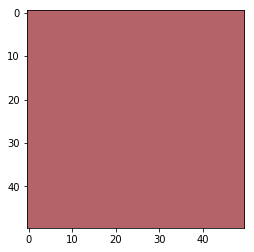

In [8]:
img = cv2.imread("img/lena.jpg", 1)

# On execute notre fonction de moyennage
mean = avg_color(img)

# On créé une image (matrice) de 50*50 dont tous les pixels ont cette couleur
avg = np.array([[mean]*50]*50, np.uint8)
# On affiche cette image avec matplotlib
plt.imshow(avg)

## I.5 Dessiner sur une image
***

### I.5.a Dessinons des points et des traits avec Pillow et Pylab

Ici nous allons utiliser :
- Le module ```Image``` de ```PIL``` (Pillow) pour charger les images
- La librairie ```Pylab``` pour la modifier et afficher le résultat

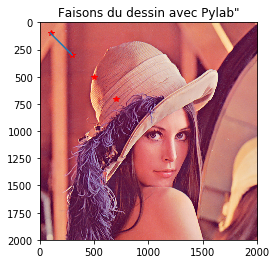

In [13]:
from PIL import Image
import pylab as pl

# Charger l'image avec le module Image de PIL et la converture en matrice avec Pylab
img = pl.array(Image.open('img/lena.jpg'))

# Afficher l'image
pl.imshow(img)

# Créons deux listes de coordonnées.
x = [100,300,500,700]
y = [100,300,500,700]
# x[0] et y[0] forment un point de coordonnées (100,100) ici

# Affichons les 4 points avec des étoiles rouges (r*)
pl.plot(x,y,'r*')

# Connectons les points un et deux
pl.plot(x[:2],y[:2])

# add title and show the plot
pl.title('Faisons du dessin avec Pylab"')
pl.show()

### I.5.b Dessinons des cercles, rectangles et traits avec OpenCV

Ici nous allons utiliser:
- ```image``` module from ```matplotlib``` (as mpimg) pour charger l'image
- ```OpenCV``` pour dessiner dessus, avec les méthodes:
    ```Python
    cv2.circle(image, (x, y), rayon, (b,g,r), épaisseur)
    cv2.rectangle(image, (x1,y1), (x2,y2), (b,g,r), épaisseur)
    cv2.line(image, (x1,y1), (x2,y2), (b,g,r), épaisseur)
    ```
- ```pyplot``` module from ```matplotlib``` (as plt) pour afficher le résultat

In [16]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

(2000, 2000, 3)


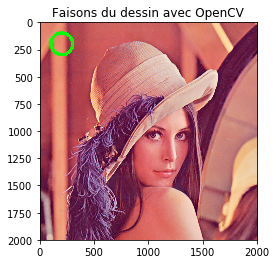

In [19]:
# Dessin d'un cercle creux d'épaisseur 30

imgRGB = mpimg.imread('img/lena.jpg')

# On enregistre l'image modifiée (avec le cercle) dans la variable res
res = cv2.circle(imgRGB, (200,200), 100, (0,255,0), 30)

# On l'affiche
plt.title('Faisons du dessin avec OpenCV')
plt.imshow(res)

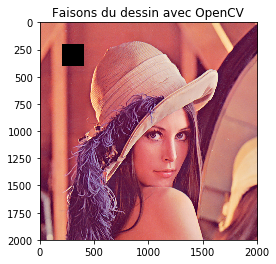

In [20]:
# Dessin d'un rectangle noir plein

imgRGB = mpimg.imread('img/lena.jpg')

# On enregistre l'image modifiée (avec le cercle) dans la variable res
res = cv2.rectangle(imgRGB, (200,200), (400,400), (0,0,0), -1)

# On l'affiche
plt.title('Faisons du dessin avec OpenCV')
plt.imshow(res)

### **[Exercice]** A vous de jouer:   
1. Placez un cercle noir qui entoure le visage de la femme sur l'image chargée.
    * Astuce : Copiez et modifiez l'exemple utilisant ```cv2.circle``` pour changer les coordonées du centre du cercle, son rayon et sa couleur
2. Placez deux points rouges au niveau de ses yeux.

In [60]:
# > Emplacement exercice <


**Remarque:** Imaginons que vous avez une méthode pour détecter une tumeur sur un scan.  
La méthode vous retourne la position (x,y) du centre de la tumeur sur l'image, et vous pourrez afficher un cercle autour grace à cette méthode.

## I.6 Séparer ou fusionner les canaux d'une image
***

**Rappel :** une image couleur est composée de 3 canaux, généralement Red, Green, Blue (RGB) ou BGR si elle à été chargée ou modifiée par OpenCV.

Il est possible de séparer ces canaux pour les visualiser séparément !

### I.6.a Séparer les canaux d'une image

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('img/lena.jpg')

In [4]:
# Séparons les canaux
red = img[:, :, 0]
green = img[:, :, 1]
blue = img[:, :, 2]

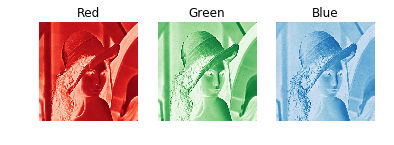

In [19]:
# Définissons une fonction pour afficher trois plots les uns à côté des autres
def displayRGB(r,g,b):
    fig = plt.figure()
    ax = fig.add_subplot(1,3,1)
    plt.imshow(r, "Reds")
    ax.set_title("Red")
    ax.axis("off")
    ax = fig.add_subplot(1,3,2)
    plt.imshow(g, "Greens")
    ax.set_title("Green")
    ax.axis("off")
    ax = fig.add_subplot(1,3,3)
    plt.imshow(b, "Blues")
    ax.set_title("Blue")
    ax.axis("off")

# Appliquons cette fonction aux canaux de notre image
displayRGB(red, green, blue)

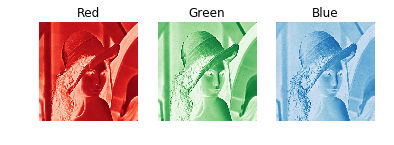

In [21]:
# Nous pouvons également effectuer la même opération avec OpenCV

import cv2
import matplotlib.pyplot as plt

def displayRGB(r,g,b):
    fig = plt.figure()
    ax = fig.add_subplot(1,3,1)
    plt.imshow(r, "Reds")
    ax.set_title("Red")
    ax.axis("off")
    ax = fig.add_subplot(1,3,2)
    plt.imshow(g, "Greens")
    ax.set_title("Green")
    ax.axis("off")
    ax = fig.add_subplot(1,3,3)
    plt.imshow(b, "Blues")
    ax.set_title("Blue")
    ax.axis("off")

img = cv2.imread("img/lena.jpg", cv2.IMREAD_COLOR)
blue,green,red = cv2.split(img)

displayRGB(red, green, blue)

**Remarque:** Afficher chacun de ces cannaux vous permet de voir comment chaque couleur contribue à l'image globale (couleur): plus une zone apparait sombre, plus c'est une zone ou ce canal de couleur contribue fortement à la couleur des pixels de l'image RGB.  
Les zones qui semblent avoir une forte valeur des trois canaux correspondent aux zones proches du blanc sur l'image globale, car un pixel blanc à une valeur proche de 255 sur chacun des trois canaux !

### I.6.b Fusionner les canaux d'une image

A partir des canaux séparés, vous pouvez reconstruire l'image couleur complète :

In [22]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("img/lena.jpg", cv2.IMREAD_COLOR)
b,g,r = cv2.split(img)

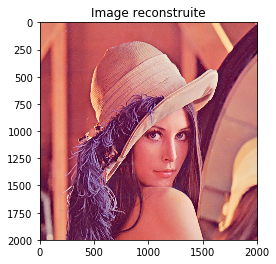

In [24]:
# On crée une nouvelle image "new" à partir des 3 cannaux obtenus par le split précédent
new = np.dstack((r,g,b))
plt.title("Image reconstruite")
plt.imshow(new)

## I.7 Sauvegarder une image
***

Pour enregistrer le contenu d'une variable image dans un fichier, OpenCV propose la méthode :
```Python
cv2.imwrite("Nom_à_donner_à_mon_fichier.extension", variable_image)
```

In [25]:
import cv2

# Je charge mon image
img = cv2.imread("img/lena.jpg", cv2.IMREAD_COLOR)

# ... Je modifie mon image ...

# Je l'enregistre dans le sous-dossier "out", sous le nom "test.png"
cv2.imwrite("out/test.png", cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

True

**Remarque:** Si l'enregistrement c'est bien fait, un ```True``` sera affiché sous la cellule après exécution. Sinon, ça sera ```False```

### **[Exercice] A vous de jouer:**  
1. Choisissez une image en ligne, chargez là, faites afficher ses dimensions (height et width) et convertissez là en RGB.
2. Séparez ses canaux
3. Créez une matrice de pixels de même taille que l'image avec le code suivant, en remplaçant ```height``` et ```width``` par leurs valeurs pour votre image d'origine : 
```Python
green = np.zeros((height, width), np.uint8)
```
4. Fusionnez les canaux bleu er rouges de l'image avec cette nouvelle matrice qui fera office de canal "vert".
5. Visualisez l'image qui en résulte à côté de l'original avec ce code:
```Python
f = plt.figure()
f.add_subplot(1,2,1)
plt.imshow(imageRGB_1)
f.add_subplot(1,2,2)
plt.imshow(imageRGB_2)
```
6. Enregistrez votre nouvelle image, et ouvrez-là ?
    * Elle est probablement rouge: cv2.imwrite s'attends à des données de type BGR, et à reçu du RGB. Du coup rouge et bleu sont inversés
    * Rajoutez une ligne pour convertir l'image de RGB à BGR avant de la sauvegarder.

Mission accomplie !

In [29]:
# > Emplacement exercice <


***
# II. Opérations géométriques sur l'image
***

Il existe de nombreuses opérations géométriques possibles sur une image. Leur principe général est de modifier la taille, forme, ou perspective (angle de vue) de l'image par des opérations matricielles.

Quelques exemples:
1. **Changement d'échelle / redimensionnement**

2. **Rogner une image**

3. **Masquage :**  
<img src="https://iphton.github.io/images/logic_op_pic.JPG" width="300">
<img src="https://iphton.github.io/images/mask_pic.JPG" width="300">

4. **Rotation :**  
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/rotation.jpg">

5. **Translations :**  
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/translation.jpg">

6. **Transformation affine :**  
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/affine.jpg" width="400">

7. **Changement de perspective :**  
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/perspective.jpg">

**Si vous voulez aller plus loin:** https://docs.opencv.org/3.4/da/d6e/tutorial_py_geometric_transformations.html

## II.1 Redimensionner une image
***

### II.1.a Avec OpenCV

OpenCV propose la fonction ```cv2.resize(image, (height, width), fx, fy, interpolation)``` avec :

**Avec:**
- ```input```: image d'origine
- ```(height, width)```: tuple spécifiant la taille de sortie de l'image
    * Exemple: ```(1000,1000)```
    * Rentrer la valeur ```None``` pour que la taille de sortie soit automatiquement calculée à partir de la taille d'entrée et des facteurs de mises à l'échelle
- ```fx```: facteur de mise à l'échelle sur l'axe des x
- ```fy```: facteur de mise à l'échelle sur l'axe des y
- ```interpolation```: type d'interpolation à appliquer pour remplir (choisir la valeur) les pixels "vides" créés par les changements d'échelle.
    * Par défaut: ```cv2.INTER_LINEAR```
    * Pour les agrandissements, préférer ```cv2.INTER_LINEAR``` ou ```cv2.INTER_CUBIC``` (un peu plus lent)
    * Pour les rétrécissements, préférer ```cv2.INTER_AREA```

In [67]:
# Importons les modules et images nécessaires

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread("img/lena.jpg", cv2.IMREAD_COLOR)
print("Dimensions de l'image : ", img.shape)

Dimensions de l'image :  (2000, 2000, 3)


Dimensions de l'image :  (4000, 4000, 3)


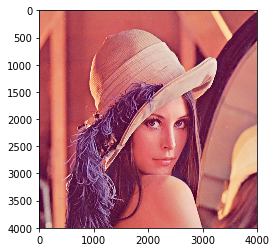

In [76]:
# On redimensionne l'image par un facteur de 2 sur l'axe x et y, et on enregistre le résultat dans la variable res
res = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

print("Dimensions de l'image : ", res.shape)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

### II.1.b Avec Pillow

```Pillow``` permet d'effectuer la même opération avec une fonction très similaire:
```Python
img = img.resize([hauteur, largeur], interpolation)
```
Avec ```interpolation``` qui peut prendre les valeurs ```Image.NEAREST``` (défaut), ```Image.BOX```, ```Image.BILINEAR```, ```Image.HAMMING```, ```Image.BICUBIC``` ou ```Image.LANCZOS```

(200, 200, 3)


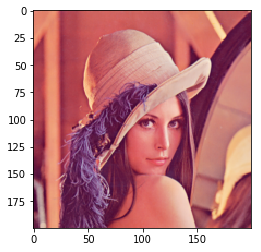

In [37]:
from PIL import Image

img = Image.open('img/lena.jpg')

# Divisons la taille de l'image par 10 : de 2000*2000 à 200*200
img = img.resize([200, 200], Image.BILINEAR)

print(np.array(img).shape)
plt.title("Image redimensionnée avec Pillow")
plt.imshow(img)

**Remarque:** Pour aller plus loin sur les différentes méthodes d'interpolation : https://zestedesavoir.com/tutoriels/1557/introduction-au-traitement-dimage/#3-les-manipulations-de-limage

### II.1.c Avec Skimage

E:\Dev\Anaconda\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


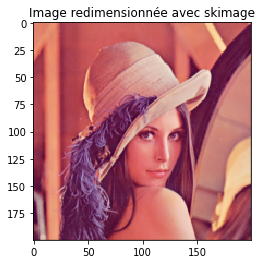

In [11]:
from skimage import io, transform
import matplotlib.pyplot as plt

# Ici nous allons utiliser imageio pour charger l'image
img2 = io.imread("img/lena.jpg")

img3 = transform.resize(img2, (200,200), anti_aliasing=True)
plt.title("Image redimensionnée avec skimage")
plt.imshow(img3)

## II.2 Rogner une image:
***

Rogner une image consiste à sélectionner une sous-portion de l'image:  

<img src="https://www.science-emergence.com/media/images/562.png" width="300">  
<img src="https://www.science-emergence.com/media/images/563.png" width="300">

Nous allons effectuer cette opération avec Pillow: il va falloir définir un rectangle (box) qui correspond à la section que l'on veut rogner.
```Python
box = (left, top, left + largeur_box, top + hauteur_box)
```

Il nous faut donc d'abord trouver ces coordonnées.
- Une méthode est d'utiliser la fenetre d'affichage d'OpenCV, qui indique les coordonnées du pixel pointé par la souris.

In [12]:
import cv2

def viewCV(image, titre="Défaut"):
    cv2.namedWindow(titre, cv2.WINDOW_NORMAL)
    cv2.imshow(titre, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

img = cv2.imread("img/lena.jpg")
viewCV(img, "Titre")

Une fois les coordonnées relevées, on peut procéder à l'opération de rognage.

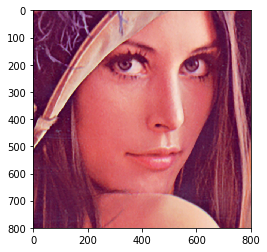

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

im = Image.open("img/lena.jpg")

left = 700
top = 840
width = 800
height = 800

box = (left, top, left+width, top+height)

# On rogne selon cette box
cropped = im.crop(box)
plt.imshow(cropped)

## II.3 Masquer une image:
***

Opération qui consiste à appliquer un "masque" sur une image afin de spécifier (spatialement) quels pixels seront modifiés ou non.

Ici un masque circulaire qui supprime (valeur à 0) tous les pixels hors du cercle :  
<img src="https://iphton.github.io/images/logic_op_pic.JPG" width="300">
<img src="https://iphton.github.io/images/mask_pic.JPG" width="300">

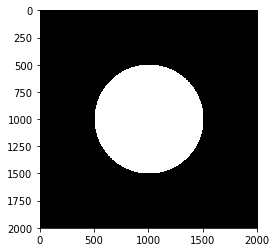

In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("img/lena.jpg")

# On crée notre masque: une matrice de la même taille que notre image, remplie de zéros (pixels noirs)
mask = np.zeros(img.shape, dtype = "uint8")

# On dessine un cercle blanc sur ce masque noir: il est centré à la position (1000,1000), avec un rayon de 500 pixels, et plein (-1)
cv2.circle(mask, (1000, 1000), 500, (255, 255, 255), -1)

# On affiche notre masque
plt.imshow(mask)

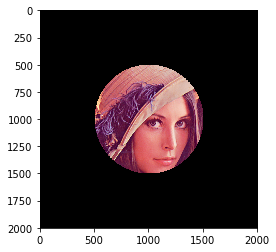

In [62]:
# On applique notre masque à l'image d'origine: on parle d'opération bitwise.
maskedImg = cv2.bitwise_and(img, mask)

# On affiche le résultat (en RGB avec plt)
plt.imshow(cv2.cvtColor(maskedImg, cv2.COLOR_BGR2RGB))

### **[Exercice]** A vous de jouer:   
1. Créez un masque blanc avec un rectangle noir au centre et appliquez le à une image de votre choix.
    * Astuce: créez un mask noir avec ```np.zeros``` et remplissez le de blanc avec le code suivant
    ```Python
    mask.fill(255)
    ```
    Et ensuite rajoutez-y un rectangle noir via OpenCV:
    ```Python
    cv2.rectangle(mask, (x1, y1), (x2, y2), couleurRGB, -1)
    ```
    Avec (x1,y1) le sommet haut gauche du rectangle, et (x2,y2) le sommet bas droit

In [13]:
# > Emplacement exercice <


## II.4 Rotation d'une image:
***

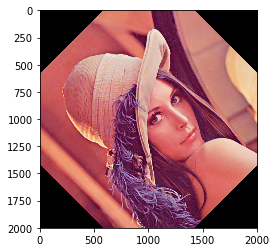

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('img/lena.jpg')

imgRot = img.rotate(45, Image.BILINEAR)

plt.imshow(imgRot)

### **[Exercice]** A vous de jouer:  
1. Choisissez une image et découpez-en un morceau (box) par rognage.
2. Faites tourner le morceau découpé de 180°
3. Superposez le morceau découpé et retourné sur l'image d'origine avec:
    ```Python
    image.paste(cropped, box)
    ```

In [14]:
# > Emplacement exercice <


***
# III. L'histogramme d'une image
***

Un **histogramme** est un tracé (statistique descriptive) décrivant la distribution de l'intensité (valeur des pixels) sur l'ensemble de l'image.
- L'axe des abscisses correspond à l'ensemble des valeurs possibles que prennent les pixels de cette image : [0, 255]
- L'axe des ordonnées correspond aux effectifs: nombre de pixels ayant cette valeur sur l'image.

Exemple:  
<img src="img/Illustrations/Hist1.jpg">

L'histogramme d'une image en couleur peut également être calculé pour chaque canal séparément :   
<img src="img/Illustrations/Hist_multi.png">

C'est un autre moyen de visualiser et comprendre le contenu d'une image : l'histogramme nous donne une idée rapide du contraste de l'image, de sa luminosité générale, de la distribution des intensités, ...
- **Remarque:** Observer les variations de l'histogramme d'une image après avoir appliqué des transformations à l'image permet de mieux comprendre comment l'image à changée.
- **Remarque:** Une autre méthode pour visualiser les propriétés d'une image serait d'observer l'image dans le domaine des fréquences, par une Transformée de Fourrier (Discrète).

**Exemples:**  
<img src="img/Illustrations/Hist3.png">  

Et si on change l'exposition (quantité de luminosité reçue) de ces images:  
<img src="img/Illustrations/Hist4.png">

La dispersion de l'histogramme donne une information sur le niveau de contraste global de l'image :  
<img src="img/Illustrations/Hist5.png">

Ou encore pour décrire différentes sections d'une image:  
<img src="img/Illustrations/Hist6.png">

**Remarque:** Ces images ont été prises sur ce [site](http://www.cambridgeincolour.com/tutorials/histograms1.htm) que vous pouvez consulter pour plus d'informations !

In [61]:
# Avant de commencer, redéfinissons les import, les méthodes utiles et importons une image, pour ne pas devoir réimporter tout le code de la section 1 en cas de redémarrage du Kernel

import cv2
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## III.1. Histogramme via le module plt de matplotlib:
***

```matplotlib.plt``` mets à notre disposition la fonction ```plt.hist()``` pour calculer l'histogramme d'une image. Cette fonction s'utilise comme suit:
```Python
plt.hist(image, bins, [min, max])
```

**Avec :**
- image: la variable image
- ```bins```: une valeur entière dans [1, 256] spécifiant le nombre de valeur sur l'axe x de l'histogramme (Optionel).
 * Si vous lui donnez la valeur 2: l'intervalle spécifié après sera divisé en 2 sous-intervalles de tailles égales
 * Si vous lui donnez la valeur 256: l'intervalle ne sera pas découpé du tout
- ```[min, max]```: les valeurs min et max de l'axe des abscisses (Optionel)
  * La valeur du ```bins``` ne peut pas être supérieure au nombre de valeur dans cet intervalle ! Par exemple, si l'intervalle est [0, 200], bins doit être <= à 200.
 
**Remarque:** Cette fonction à plus de paramètres possibles que ceux présentés ici, mais nous n'en avons pas l'utilité pour l'instant.

### III.1.a En niveaux de gris:

(2000, 2000)


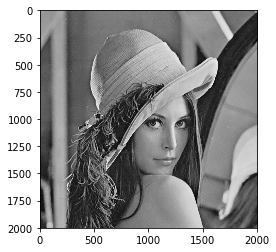

In [2]:
img = cv2.imread('img/lena.jpg', cv2.IMREAD_GRAYSCALE)

# Affichons le résultat pour vérification
plt.imshow(img, 'gray')
print(img.shape)

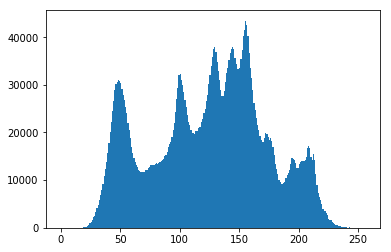

In [3]:
# Calculons l'histogramme avec plt
plt.hist(img.ravel(),256,[0,256])

# Affichons-le
plt.show()

### **[Exercice]** A vous de jouer:   
1. Changez les valeurs de ```bins``` et de ```[min, max]``` et observez les changements de l'histogramme.
2. Trouver deux images sur internet, les charger en noir et blanc et afficher leurs histogrammes côte-à-côte, et observez les différences.

In [85]:
# > Emplacement exercice <


### III.1.b En couleur:

(2000, 2000, 3)


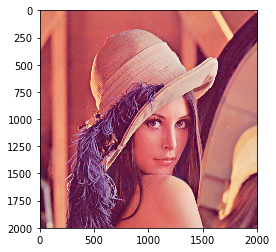

In [62]:
# Chargons l'image avec le module mpimg de matplotlib
img = mpimg.imread('img/lena.jpg')

# Affichons le résultat pour vérification
print(img.shape)
plt.imshow(img)

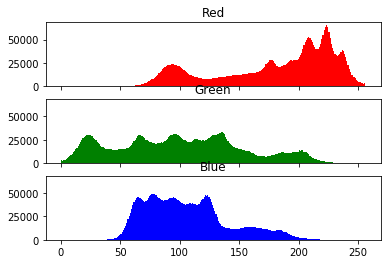

In [63]:
# On sépare les trois canaux en découpant la matrice tridimensionnelle qui représente l'image couleur.
r = img[:, :, 0]
g = img[:, :, 1]
b = img[:, :, 2]

# On les affiche dans un même graphique comprenant 3 subplots
fig, axs = plt.subplots(3, sharex=True, sharey=True)

axs[0].hist(r.ravel(), 256, [0,256], facecolor='r')
axs[0].set_title('Red')
axs[1].hist(g.ravel(), 256, [0,256], facecolor='g')
axs[1].set_title('Green')
axs[2].hist(b.ravel(), 256, [0,256], facecolor='b')
axs[2].set_title('Blue')

plt.show()

## III.2 Histogramme via OpenCV:
***

```OpenCV``` mets à notre disposition la fonction ```cv2.calcHist()``` pour calculer l'histogramme d'une image. Cette fonction s'utilise comme suit:
```Python
cv2.calcHist([image], [canal], mask, [bins], [min, max])
```

**Avec:**
- ```image``` : nom de la variable image, entre crochets
- ```canal``` : numéro du canal a afficher
    * Image en gris: [0]
    * Image en couleur:
        - [0] ou [b]: bleu
        - [1] ou [g]: vert
        - [2] ou [r]: rouge
- ```mask``` : masque à appliquer à l'image. Indiquer ```None``` sinon.
- ```bins``` : nombre de sous-divisions dans l'intervalle des valeurs à afficher. Pour afficher l'histogramme complet, utiliser [256].
- ```[min, max]``` : intervalle de valeurs à afficher. Par défaut, utiliser [0,256].

### III.2.a En niveaux de gris:

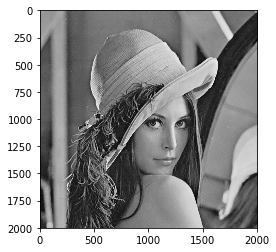

In [175]:
# Chargement de l'image en niveaux de gris avec OpenCV et affichage
imgCV = cv2.imread('img/lena.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(imgCV, "gray")

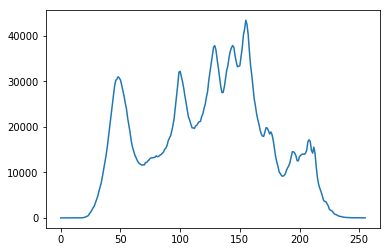

In [176]:
# Calcul et affichage de l'histogramme
hist = cv2.calcHist([imgCV], [0], None, [256], [0,256])
plt.plot(hist)

### III.2.b En couleur:

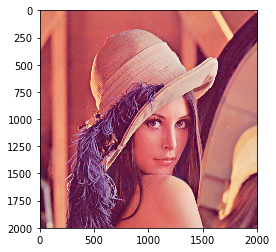

In [38]:
imgCV = cv2.imread('img/lena.jpg', cv2.IMREAD_COLOR)
imgRGB = cv2.cvtColor(imgCV, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)

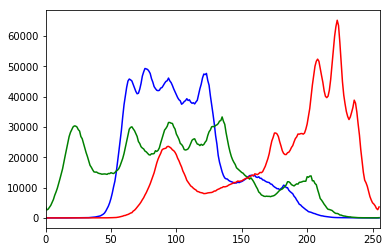

In [39]:
# Affichage des histogrammes des 3 canaux colorimétriques

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([imgCV],[i],None,[256],[0,256])
    plt.plot(histr, color = col)
    plt.xlim([0,256])
plt.show()

### **[Exercice] A vous de jouer:**  
1. Choisissez une image en ligne, chargez là, faites afficher ses dimensions (height et width)
2. Séparez ses canaux avec OpenCV et affichez les dans un même graphique
3. Redimensionez l'image et faite de nouveau afficher son histogramme

In [48]:
# > Emplacement exercice <


***
# Fin du TP1
***